# Python Programming: K-nearest neighbor (kNN) classifier

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Develop a model that predicts the chances of one to survive during titanic accident.

### b) Defining the Metric for Success

the metric of success will be determined by the following metrics

- Accuracy Score 
- Precision Score
- Recall Score 
- F1 Score

### c) Recording the Experimental Design

- Defining the question
- Importing the library
- Loading the data
- Previewing the data
- Feature engineering
- EDA
- KNN
- Conclussion


###Importing the libraries

In [2]:
# Importing Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split




## 2. Reading the Data

In [3]:
# Loading the Data from the source 
# ---
# Dataset source = Train Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
# ---Test Dataset source=https://archive.org/download/test1_202002/test%20%281%29.csv
#Dataset2 Source=https://archive.ics.uci.edu/ml/datasets/Spambase

df= pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')



## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
rows,columns = df.shape
print(f'There are {rows} rows, and {columns} columns')

There are 891 rows, and 12 columns


In [5]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#Columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Dropping name column
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId'],axis=1)

In [9]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
#Encoding the independent variables using get dummies
df1=df.select_dtypes(include=['object'])

#specifying the columns
columns=df1.columns.to_list()
columns


['Sex', 'Embarked']

In [11]:
#Encoding 
df1=pd.get_dummies(data=df1,columns=['Sex', 'Embarked'])

In [12]:
#dropping the encoded columns
df=df.drop(columns=['Sex', 'Embarked'],axis=1)

In [13]:
#setting index column on imputed dataframe
df1['index_col'] = df1.index
#setting column on the coriginal dataframe
df['index_col'] = df.index

In [14]:
#Joining the two dataferames
df2 =df.join(df1.set_index('index_col'),on='index_col')

In [15]:
#dropping inde column
df=df2.drop(columns=['index_col'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

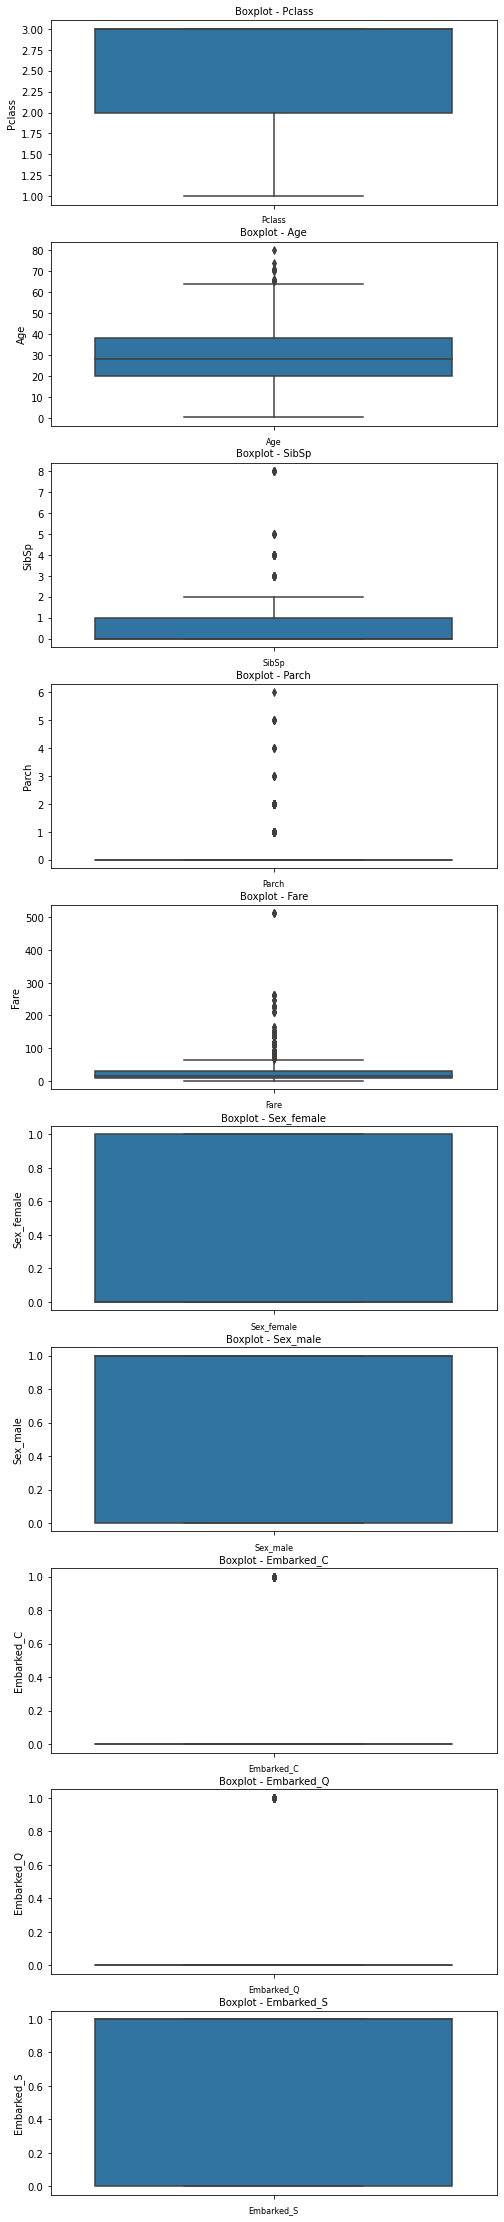

In [16]:
# Checking for Outliers
#
col_names= df.drop(columns=['Survived']).columns.to_list()
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val),fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Age and Sex does not have outliers

In [17]:
# Checking for Anomalies
#
print("There were no anomalirs in the dataset")

There were no anomalirs in the dataset


In [18]:
# Identifying the Missing Data
#
print(df.isnull().sum())
print("*************************")
print("Age has 177 null values. The null values will be droped")

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64
*************************
Age has 177 null values. The null values will be droped


In [19]:
#dropping null values
df=df.dropna()

In [20]:
# More data cleaning procedures
#checking the duplicates
print(df.duplicated().sum())
print("*******************")
print("The dataset does not have duplicate values")

38
*******************
The dataset does not have duplicate values


In [21]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## 6. Exploratory Analysis

###Univariate Analysis

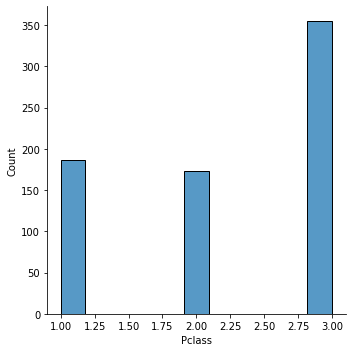

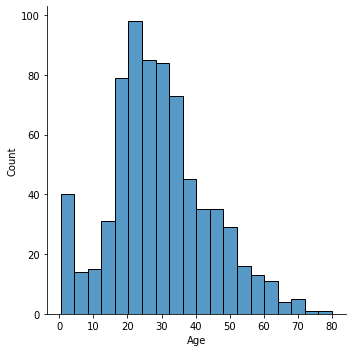

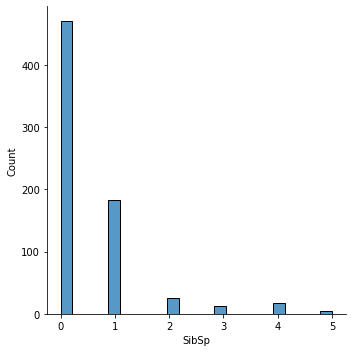

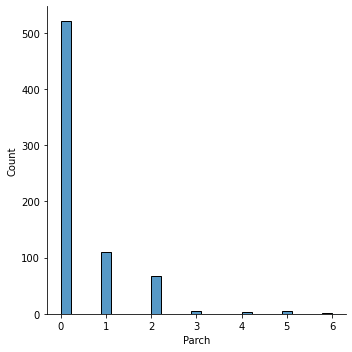

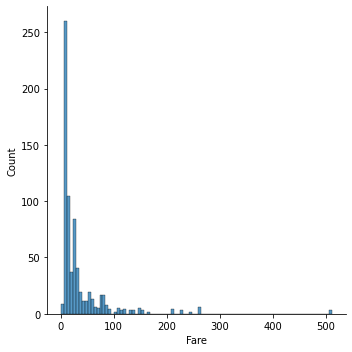

In [22]:
#Checking for normality distributin
continous_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for features in continous_features:
  sns.displot(df[features])
  plt.show()

most of the features shows normal distribution

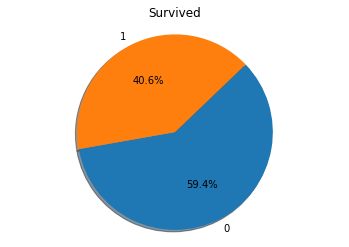

In [24]:
#survived pie chart representation
Survived_pie = df['Survived'].value_counts()

#plotting pie chart
plt.pie(Survived_pie,labels = Survived_pie.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('Survived')

#Displaying the plot
plt.show()

59.4% percergers survived while 40.6% did not survive

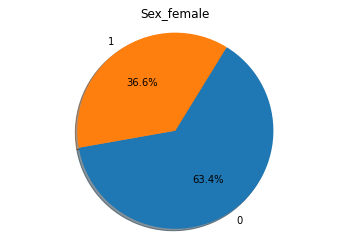

In [26]:
#Sex_femalepie chart representation
Sex_female = df['Sex_female'].value_counts()

#plotting pie chart
plt.pie(Sex_female,labels = Sex_female.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('Sex_female')

#Displaying the plot
plt.show()

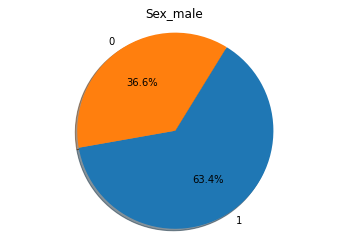

In [27]:
#Sex_male pie chart representation
Sex_male = df['Sex_male'].value_counts()

#plotting pie chart
plt.pie(Sex_male,labels = Sex_male.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('Sex_male')

#Displaying the plot
plt.show()

###Bivariate Analysis

In [21]:
# Ploting the bivariate summaries and recording our observations
#
# sns.pairplot(df);

In [22]:
# Data Reduction
#checking for multicollineality using VIF score
#Dealing with exponential notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Checking for correlation
corr=df.corr()
corr

#VIF Score
pd.DataFrame(np.linalg.inv(corr.values),index = corr.index, columns=corr.columns)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.676,0.536,0.317,0.161,0.031,-0.035,0.178,1.119,0.118,0.125,0.222
Pclass,0.536,1.969,0.651,0.039,-0.154,0.867,0.209,0.290,-0.110,-0.283,-0.281
Age,0.317,0.651,1.382,0.358,0.065,0.063,0.323,0.338,0.507,0.176,0.482
SibSp,0.161,0.039,0.358,1.299,-0.397,-0.170,-0.038,0.035,0.026,-0.086,-0.051
Parch,0.031,-0.154,0.065,-0.397,1.291,-0.276,-0.014,0.315,-0.216,-0.087,-0.297
Fare,-0.035,0.867,0.063,-0.170,-0.276,1.647,-0.136,-0.099,-0.068,0.067,0.208
Sex_female,0.178,0.197,0.334,-0.037,0.007,-0.116,-1801439850948197.500,-1801439850948198.250,-4.162,-2.210,-4.609
Sex_male,0.976,0.259,0.341,0.022,0.278,-0.086,-1801439850948198.000,-1801439850948197.000,-4.634,-2.382,-5.141
Embarked_C,0.118,-0.110,0.507,0.026,-0.216,-0.068,-6.324,-6.796,54.547,27.078,58.166
Embarked_Q,0.125,-0.283,0.176,-0.086,-0.087,0.067,-3.315,-3.487,27.078,14.692,29.420


In [23]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(df[to_drop], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000,1,0,7.250,0,0,0,1
1,1,1,38.000,1,0,71.283,1,1,0,0
2,1,3,26.000,0,0,7.925,1,0,0,1
3,1,1,35.000,1,0,53.100,1,0,0,1
4,0,3,35.000,0,0,8.050,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000,0,5,29.125,1,0,1,0
886,0,2,27.000,0,0,13.000,0,0,0,1
887,1,1,19.000,0,0,30.000,1,0,0,1
889,1,1,26.000,0,0,30.000,0,1,0,0


## 7. Implementing the Solution

In [24]:
# Implementing the Solution
# defining independent variables
X=df.drop(columns=['Survived'], axis=1)

#Defining the dependent variable
y=df['Survived']

**Spliting the data into  80 - 20 set**

In [25]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [26]:
# #scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [28]:
#Making the prediction
y_pred = classifier.predict(X_test)

In [29]:
#Plotting confusiion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print("***************************************")
print(classification_report(y_test,y_pred))

print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score :',recall_score(y_test,y_pred))
print('F1 Score :',f1_score(y_test,y_pred))

[[75  9]
 [15 44]]
***************************************
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        84
           1       0.83      0.75      0.79        59

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.83       143

Accuracy Score : 0.8321678321678322
Precision Score : 0.8301886792452831
Recall Score : 0.7457627118644068
F1 Score : 0.7857142857142858


**Spliting the data into  70-30 set**

In [30]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [31]:
#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#Making the prediction
y_pred = classifier.predict(X_test)

In [32]:
#Plotting confusiion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print("***************************************")
print(classification_report(y_test,y_pred))

print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score :',recall_score(y_test,y_pred))
print('F1 Score :',f1_score(y_test,y_pred))

[[107  29]
 [ 34  45]]
***************************************
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       136
           1       0.61      0.57      0.59        79

    accuracy                           0.71       215
   macro avg       0.68      0.68      0.68       215
weighted avg       0.70      0.71      0.70       215

Accuracy Score : 0.7069767441860465
Precision Score : 0.6081081081081081
Recall Score : 0.569620253164557
F1 Score : 0.5882352941176471


**Spliting the data into  60-40 set**

In [33]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)

#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#Making the prediction
y_pred = classifier.predict(X_test)

In [34]:
#Plotting confusiion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print("***************************************")
print(classification_report(y_test,y_pred))

print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score :',recall_score(y_test,y_pred))
print('F1 Score :',f1_score(y_test,y_pred))

[[130  41]
 [ 53  62]]
***************************************
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       171
           1       0.60      0.54      0.57       115

    accuracy                           0.67       286
   macro avg       0.66      0.65      0.65       286
weighted avg       0.67      0.67      0.67       286

Accuracy Score : 0.6713286713286714
Precision Score : 0.6019417475728155
Recall Score : 0.5391304347826087
F1 Score : 0.5688073394495413


###Conclusion

When the data is split into **80-20 set**, the following are the outcomes:

- Accuracy Score : 0.8321678321678322
- Precision Score : 0.8301886792452831
- Recall Score : 0.7457627118644068
- F1 Score : 0.7857142857142858

When the data is split into **70-30 set**, the following are the outcomes:

- Accuracy Score : 0.7069767441860465
- Precision Score : 0.6081081081081081
- Recall Score : 0.569620253164557
- F1 Score : 0.5882352941176471

When the data is split into **60-40 set**, the following are the outcomes:

- Accuracy Score : 0.6713286713286714
- Precision Score : 0.6019417475728155
- Recall Score : 0.5391304347826087
- F1 Score : 0.5688073394495413

When the training data decreases, the accuracy score, precision score,recall score and f1 acore decreases.

In order to avoid drop in the accuracy, more data is needed while training the model.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [35]:
# Reviewing the Solution 
# Challenging the solution using Naive Bayes clasifier
from sklearn.naive_bayes import GaussianNB


In [36]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [37]:
#training the model
clf=GaussianNB()
model=clf.fit(X_train,y_train)

In [38]:
#Evaluating the model
y_predicted = model.predict(X_test)
print(np.mean(y_predicted==y_test))

0.6993006993006993


In [39]:
#printing confusion matrix and classification report
print(confusion_matrix(y_test,y_predicted))
print("*****************************************")
print(classification_report(y_test,y_predicted))

[[68 19]
 [24 32]]
*****************************************
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        87
           1       0.63      0.57      0.60        56

    accuracy                           0.70       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.70      0.70      0.70       143



**KNN has beter accuracy  hence it will remain to be the best model at this point**

## 9. Follow up questions

### a). Did we have the right data?

Yes the data was right.

### b). Do we need other data to answer our question?

more data was needed in order to improve the accuracy of the model

### c). Did we have the right question?

Yes, the question was riht and precise